In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as slv


## Часть 1

Уравнение
$$ y' = y^2 - y$$
Решение: 
$$y =  \frac{1}{e^{c_1 + t} + 1}$$


### 1.1 Построение точных решений

In [20]:
t = np.linspace(0, 10, 500)


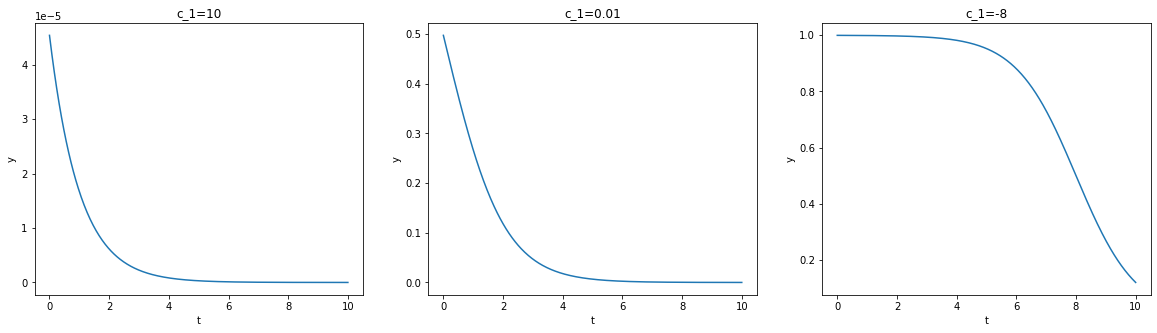

In [3]:
fig = plt.figure(figsize = (20, 5))


ax1 = fig.add_subplot(131)
c_1 =10
ax1.title.set_text(f'c_1={c_1}')
plt.plot(t, 1/(np.e**(c_1 + t) + 1))
plt.xlabel('t')
plt.ylabel('y')

ax2 = fig.add_subplot(132)
c_1 = 0.01
ax2.title.set_text(f'c_1={c_1}')
plt.plot(t, 1/(np.e**(c_1 + t) + 1))
plt.xlabel('t')
plt.ylabel('y')

ax3 = fig.add_subplot(133)
c_1 = - 8
ax3.title.set_text(f'c_1={c_1}')
plt.plot(t, 1/(np.e**(c_1 + t) + 1))
plt.xlabel('t')
plt.ylabel('y')

plt.show()




### 1.2 Решение с помощью RK45

In [4]:
def func(t, y):
    return y**2 - y

#y0 = -1
# (fun, t0, y0, t_bound, max_step=inf, rtol=0.001, atol=1e-06, vectorized=False, first_step=None, **extraneous)
solutionRK45_a = slv.RK45(func, 0, [-1], 20, max_step = 0.1, rtol=0.5, atol=np.e)

t_values_rk45_a = []
y_values_rk45_a = []

for i in range(100):
    # получение решения на этом шаге
    solutionRK45_a.step()
    t_values_rk45_a.append(solutionRK45_a.t)
    y_values_rk45_a.append(solutionRK45_a.y[0])
    # останновить цикл после завершения рассчётов
    if solutionRK45_a.status == 'finished':
        break

#y0 = 0.5
solutionRK45_b = slv.RK45(func, 0, [0.5], 20, max_step = 0.1, rtol=0.5, atol=np.e)

t_values_rk45_b = []
y_values_rk45_b = []

for i in range(100):
    # получение решения на этом шаге
    solutionRK45_b.step()
    t_values_rk45_b.append(solutionRK45_b.t)
    y_values_rk45_b.append(solutionRK45_b.y[0])
    # останновить цикл после завершения рассчётов
    if solutionRK45_b.status == 'finished':
        break


Text(0.5, 1.0, 'dy/dt от y')

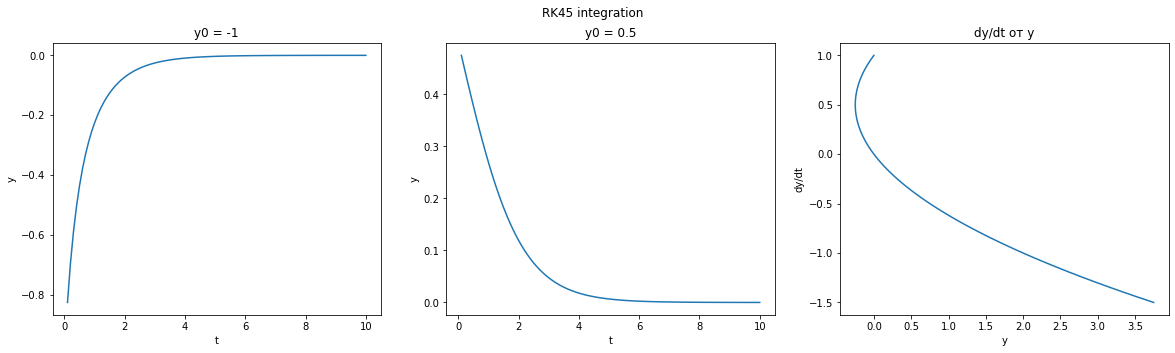

In [5]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle('RK45 integration')

ax1 = fig.add_subplot(131)
ax1.plot(t_values_rk45_a, y_values_rk45_a)
ax1.set_xlabel('t')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(132)
ax2.plot(t_values_rk45_b, y_values_rk45_b)
ax2.set_xlabel('t')
ax2.set_ylabel('y')

Fy = lambda y: y**2- y
ys = np.linspace(-1.5, 1, 50)
ax3 = fig.add_subplot(133)
ax3.plot(Fy(ys), ys)
ax3.set_xlabel('y')
ax3.set_ylabel('dy/dt')

ax1.set_title('у0 = -1')
ax2.set_title('у0 = 0.5')
ax3.set_title('dy/dt от y')

### 1.3 Решение с помощью BDF

In [6]:
def func(t, y):
    return y**2 - y

#y0 = -1
# (fun, t0, y0, t_bound, max_step=inf, rtol=0.001, atol=1e-06, vectorized=False, first_step=None, **extraneous)
solutionBDF_a = slv.BDF(func, 0, [-1], 20, max_step = 0.1, rtol=0.5, atol=np.e)

t_values_BDF_a = []
y_values_BDF_a = []

for i in range(100):
    # получение решения на этом шаге
    solutionBDF_a.step()
    t_values_BDF_a.append(solutionBDF_a.t)
    y_values_BDF_a.append(solutionBDF_a.y[0])
    # останновить цикл после завершения рассчётов
    if solutionBDF_a.status == 'finished':
        break

# y0 = 0.5
solutionBDF_b = slv.BDF(func, 0, [0.5], 20, max_step = 0.1, rtol=0.5, atol=np.e)

t_values_BDF_b= []
y_values_BDF_b = []

for i in range(100):
    # получение решения на этом шаге
    solutionBDF_b.step()
    t_values_BDF_b.append(solutionBDF_b.t)
    y_values_BDF_b.append(solutionBDF_b.y[0])
    # останновить цикл после завершения рассчётов
    if solutionBDF_b.status == 'finished':
        break 
        
        
# y0 = 2
solutionBDF_d = slv.BDF(func, 0, [2], 20, max_step = 0.1, rtol=0.5, atol=np.e)

t_values_BDF_d= []
y_values_BDF_d = []

for i in range(100):
    # получение решения на этом шаге
    solutionBDF_d.step()
    t_values_BDF_d.append(solutionBDF_d.t)
    y_values_BDF_d.append(solutionBDF_d.y[0])
    # останновить цикл после завершения рассчётов
    if solutionBDF_d.status == 'finished':
        break  

Text(0.5, 1.0, 'у0 = 1')

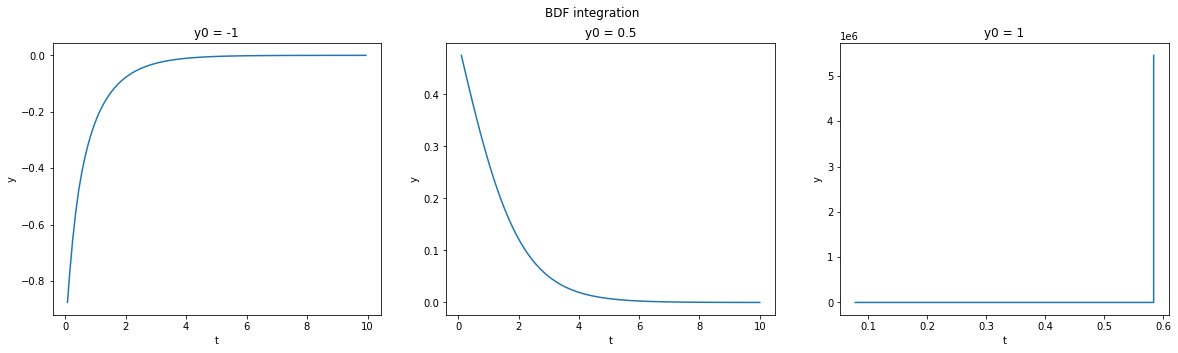

In [7]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle('BDF integration')

ax1 = fig.add_subplot(131)
ax1.plot(t_values_BDF_a, y_values_BDF_a)
ax1.set_xlabel('t')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(132)
ax2.plot(t_values_BDF_b, y_values_BDF_b)
ax2.set_xlabel('t')
ax2.set_ylabel('y')

Fy = lambda y: y**2- y
ys = np.linspace(-1.5, 1, 50)
ax3 = fig.add_subplot(133)
ax3.plot(t_values_BDF_d, y_values_BDF_d)
ax3.set_xlabel('t')
ax3.set_ylabel('y')

ax1.set_title('у0 = -1')
ax2.set_title('у0 = 0.5')
ax3.set_title('у0 = 1')

Rk45 не может вычислить решение для y0 >= 1  
BDF вычисляет но получается что-то странное

## Часть 2

### 2.1

Модель Олли

$$
\frac{d N}{d t}=r \cdot N \cdot\left(1-\frac{N}{K}\right) \cdot (N - l)
$$  




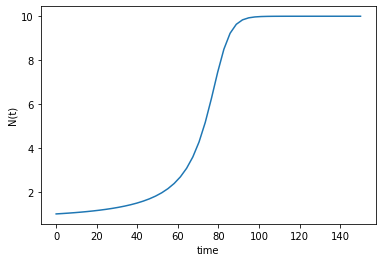

In [22]:
# решение

rKl = [0.03, 10, 0.8]

def func(N, t, params):
    r, K, l = params
    eq =  r * N*(1 - N/K)*(N- l)
    return eq

N0 = 1
t_ollie = np.linspace(0, 150)
Nint = slv.odeint(func, N0, t_ollie, args=(rKl,))

plt.plot(t_ollie, Nint)
plt.xlabel('time')
plt.ylabel('N(t)')
plt.show()

(-1.0, 13.0)

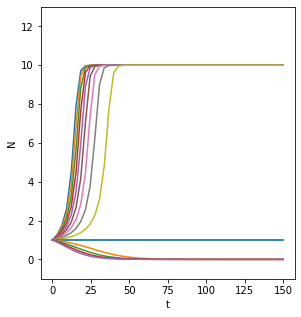

In [24]:
# много решений с изменением параметра l

l_pars = np.append(np.linspace(0, 1, 10), np.linspace(1,  1.5, 5))

plt.figure(figsize = (10,5))
plt.subplot(121)

for l_par in l_pars:
    rKl = [0.08, 10, l_par]
    Nint = slv.odeint(func, N0, t_ollie, args=(rKl,))
    plt.plot(t_ollie, Nint)
    

plt.xlabel('t')
plt.ylabel('N')
plt.ylim(-1, 13)    
    


r  - скорость роста популяции  
N - ёмкость среды  
l - фактор плотности популяции?  

l = N0: численность не изменяется (производная обнуляется)  
l < N0: численность растёт и выходит на плато соотв. ёмкости среды  
l > N0: численность падает до нуля  
поскольку компонент(N - l) определяет отрицательность / положительность производной

чем меньше l тем быстрее происходит скачок численности и выход на плато



### 2.3 Графики правой части

Text(0, 0.5, 'N')

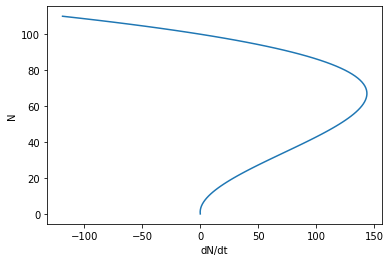

In [412]:
# l  = 2
# K = 100

rkl = [0.1, 100, 2]
Ns = np.linspace(0, 110, 100)
plt.plot(func(Ns, 0, rkl), Ns)
plt.xlabel('dN/dt')
plt.ylabel('N')

Пока N маленькое, значение производной возрастает, достигнет максимума примерно в области N = K/2 (зона резкого повышения численности) положение зависит от значений r и l), затем производная вовращается к нулю, когда N приближается к значению K (выход на плато)

N0 задаёт исходную численность популяции, соотв. если N0 больше ёмкости (K)- то производная будет отрицательна, численность будет сокращаться, чем больше разница между N0 и K  - тем более отрицательна производная (тут это область значений N > 100)
В процессе развития модель в эту область не может  попасть естественнм путём, поскольку останавливается в  точке равновесия K

Text(0, 0.5, 'N')

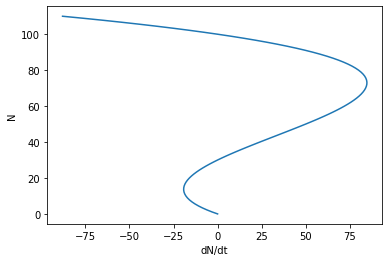

In [413]:
# l  = 30
# K = 100
rkl = [0.1, 100, 20]
Ns = np.linspace(0, 110, 100)
plt.plot(func(Ns, 0, rkl), Ns)
plt.xlabel('dN/dt')
plt.ylabel('N')

В области где l > N0  производная отрицательна т.е при N0 в этой области   модель уйдёт к точке равновесия = 0

## Часть 3

C:\More_Program_Files\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\More_Program_Files\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\More_Program_Files\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\More_Program_Files\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warn

(-2.0, 10.0)

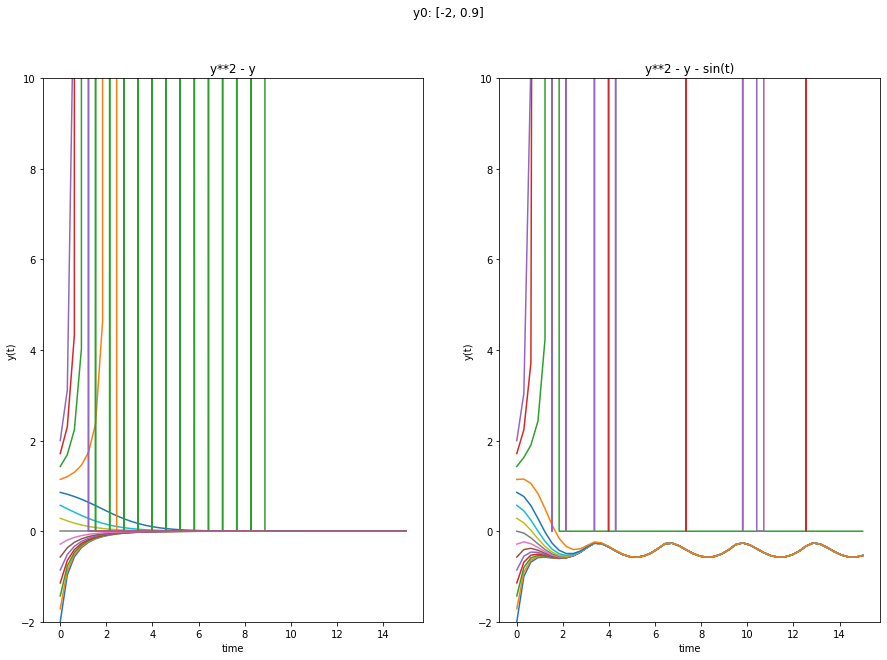

In [27]:


def func0(y, t):
    return y**2 - y

def func1(y, t):

    return y**2 - y - np.abs(np.sin(t))


y0 = np.linspace(-2, 2, 15) # начльные значения y
#ys = np.linspace(-1, 4, 100) # 
t_part3 = np.linspace(0, 15)

fig = plt.figure(figsize = (15,10))
fig.suptitle('y0: [-2, 0.9]')

ax1 = fig.add_subplot(121)
for i in y0:
    yint = slv.odeint(func0, i, t_part3)
    ax1.plot(t_part3, yint)
ax1.set_title('y**2 - y')
ax1.set_xlabel('time')
ax1.set_ylabel('y(t)')
ax1.set_ylim(-2, 10)


ax2 = fig.add_subplot(122)
for i in y0:
    yint = slv.odeint(func1, i, t_part3)
    ax2.plot(t_part3, yint)
ax2.set_title('y**2 - y - sin(t)')
ax2.set_xlabel('time')
ax2.set_ylabel('y(t)')
ax2.set_ylim(-2, 10)


График сохраняет общую исходную форму, но добавляется синусоидальный компонент
Там, где модель приходит к точке равновесия остаётся только синусоида